Social Network Ad-Conversion Prediction

---



# LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, ConfusionMatrixDisplay

#Load the Dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Social_Network_Ads.csv')

# to check the data set

print(df.head(5))
print(df.info())

    User ID  Gender   Age  EstimatedSalary Purchased
0  15624510    Male  19.0            19000        No
1  15810944    Male  35.0            20000        No
2  15668575  Female   NaN            43000        No
3  15603246  Female  27.0            57000        No
4  15804002    Male  19.0            76000        No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              399 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.8+ KB
None


#Handeling the missing values

In [7]:
df = df.dropna()

#Encoding the Target Variable (if Yes/No)

In [8]:
if df['Purchased'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['Purchased'] = label_encoder.fit_transform(df['Purchased'])

#Data Visualization - Age Distribution

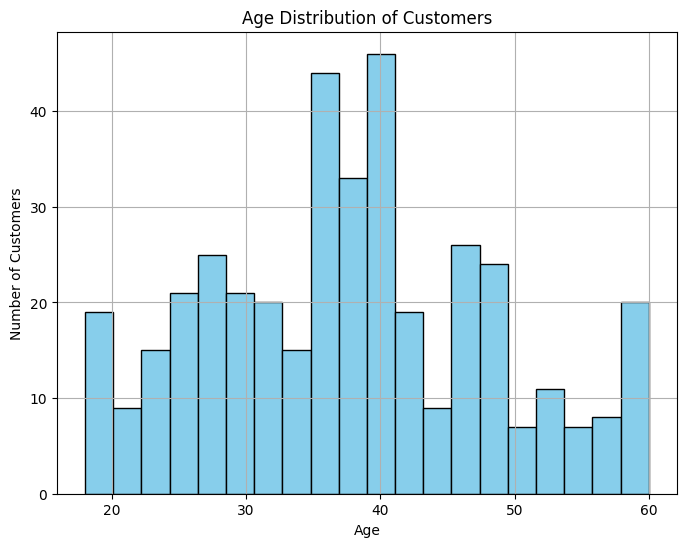

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

#Data Visualization - Salary Distribution

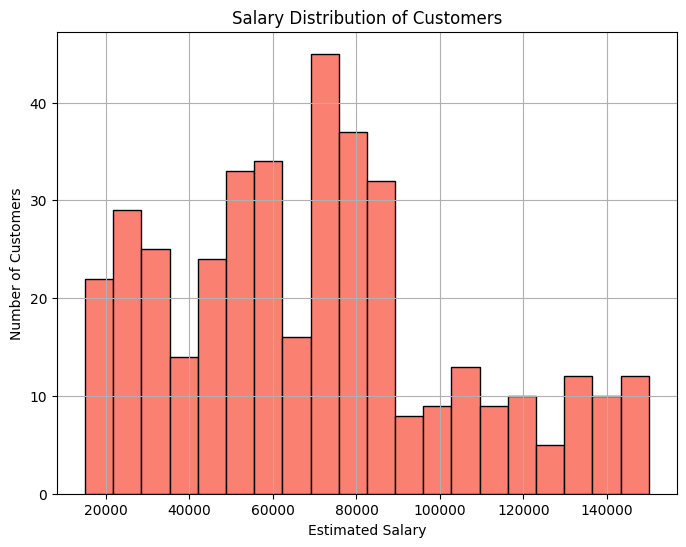

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['EstimatedSalary'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Salary Distribution of Customers')
plt.grid(True)
plt.show()

#Features and Target

In [11]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

#Spliting the data for Traning(80%) and Test(20%)





---



In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Feature Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Traning the Model (**Logistic Regration Model**)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Let's check the distribution of the 'Purchased' column in the DataFrame
print(df['Purchased'].value_counts())

Purchased
0    256
1    143
Name: count, dtype: int64


#Make Predictions

In [16]:
y_pred = model.predict(X_test)

#Accuracy and F1 Score

In [17]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f"F1 Score: {f1}")

Accuracy: 0.85
F1 Score: 0.7391304347826086


<Figure size 800x600 with 0 Axes>

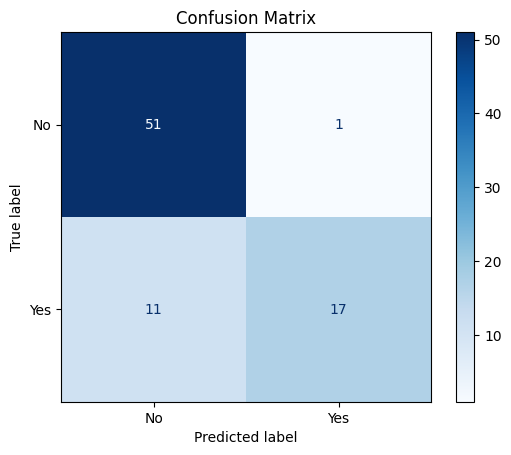

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
